<a href="https://colab.research.google.com/github/tissueandcells/XAI/blob/main/FA_HDAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 596 kB 15.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [ ]:


# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Target search for Friedreich Atxia
target = new_client.target
target_query = target.search('HDAC')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q70I53', 'xref_name': None, 'xre...",Alcaligenes sp. (strain DSM 11172) (Bordetella...,Histone deacetylase-like amidohydrolase,15.0,False,CHEMBL6017,"[{'accession': 'Q70I53', 'component_descriptio...",SINGLE PROTEIN,242601
1,[],Mus musculus,Lysine-specific histone demethylase 1A,12.0,False,CHEMBL4295874,"[{'accession': 'Q6ZQ88', 'component_descriptio...",SINGLE PROTEIN,10090
2,"[{'xref_id': 'O60341', 'xref_name': None, 'xre...",Homo sapiens,Lysine-specific histone demethylase 1,10.0,False,CHEMBL6136,"[{'accession': 'O60341', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,LSD1/CoREST complex,9.0,False,CHEMBL3137262,"[{'accession': 'O60341', 'component_descriptio...",PROTEIN COMPLEX,9606
4,[],Homo sapiens,Lysine-specific histone demethylase 1A/REST co...,9.0,False,CHEMBL4296114,"[{'accession': 'O60341', 'component_descriptio...",PROTEIN COMPLEX,9606


In [ ]:
targets[(targets["organism"]=="Homo sapiens") & (targets["target_type"]=="SINGLE PROTEIN")]

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
2,"[{'xref_id': 'O60341', 'xref_name': None, 'xre...",Homo sapiens,Lysine-specific histone demethylase 1,10.0,False,CHEMBL6136,"[{'accession': 'O60341', 'component_descriptio...",SINGLE PROTEIN,9606


In [ ]:
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL6136'

In [ ]:


activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
res

[{'activity_comment': None, 'activity_id': 2650056, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL1025179', 'assay_description': 'Inhibition of LSD1', 'assay_type': 'B', 'assay_variant_accession': None, 'assay_variant_mutation': None, 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'canonical_smiles': 'N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1158462', 'document_journal': 'J. Med. Chem.', 'document_year': 2009, 'ligand_efficiency': None, 'molecule_chembl_id': 'CHEMBL3989843', 'molecule_pref_name': 'TRANYLCYPROMINE', 'parent_molecule_chembl_id': 'CHEMBL3989843', 'pchembl_value': None, 'potential_duplicate': True, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 816262, 'relation': '<', 'src_id': 1, 'standard_flag': True, 'standard_relation': '<', 'standard_text_value': None, 'standard_type': 'IC50', 'stand

In [ ]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2650056,[],CHEMBL1025179,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,None,None,CHEMBL1158462,J. Med. Chem.,2009,None,CHEMBL3989843,TRANYLCYPROMINE,CHEMBL3989843,None,True,http://www.openphacts.org/units/Nanomolar,816262,<,1,True,<,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
1,None,3301678,[],CHEMBL1119011,Reversible Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,None,None,CHEMBL1155444,J. Med. Chem.,2010,"{'bei': '2.11', 'le': None, 'lle': None, 'sei'...",CHEMBL1086216,None,CHEMBL1086216,4.81,True,http://www.openphacts.org/units/Nanomolar,914789,=,1,True,=,None,IC50,nM,None,15600.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,15.6
2,None,6260519,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '12.85', 'le': '0.24', 'lle': '2.31', ...",CHEMBL1215658,None,CHEMBL1215658,5.70,False,http://www.openphacts.org/units/Nanomolar,1438288,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
3,None,6260520,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '12.85', 'le': '0.24', 'lle': '2.31', ...",CHEMBL1797639,None,CHEMBL1797639,5.70,False,http://www.openphacts.org/units/Nanomolar,1438289,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
4,None,6260524,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,NC1CC1c1c(F)c(F)c(F)c(F)c1F,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '22.61', 'le': '0.46', 'lle': '2.85', ...",CHEMBL1797642,None,CHEMBL1797642,5.05,False,http://www.openphacts.org/units/Nanomolar,1438293,=,1,True,=,None,IC50,nM,None,9000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,None,20716216,[],CHEMBL4630174,Inhibition of recombinant N-terminal His-tagge...,B,None,None,BAO_0000190,BAO_0000019,assay format,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,None,None,CHEMBL4627402,ACS Med Chem Lett,2020,"{'bei': '34.90', 'le': '0.64', 'lle': '3.61', ...",CHEMBL4646049,None,CHEMBL4646049,6.05,False,http://www.openphacts.org/units/Nanomolar,3489041,=,1,True,=,None,IC50,nM,None,898.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,0.898
1350,None,20716217,[],CHEMBL4630174,Inhibition of recombinant N-terminal His-tagge...,B,None,None,BAO_0000190,BAO_0000019,assay format,C/C(=C\C1CC1N)c1ccccc1,None,None,CHEMBL4627402,ACS Med Chem Lett,2020,"{'bei': '30.99', 'le

In [ ]:
df.to_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_01_bioactivity_data_raw.csv', index=False)

In [ ]:
#  Handling missing data¶ 
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2650056,[],CHEMBL1025179,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,None,None,CHEMBL1158462,J. Med. Chem.,2009,None,CHEMBL3989843,TRANYLCYPROMINE,CHEMBL3989843,None,True,http://www.openphacts.org/units/Nanomolar,816262,<,1,True,<,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
1,None,3301678,[],CHEMBL1119011,Reversible Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,None,None,CHEMBL1155444,J. Med. Chem.,2010,"{'bei': '2.11', 'le': None, 'lle': None, 'sei'...",CHEMBL1086216,None,CHEMBL1086216,4.81,True,http://www.openphacts.org/units/Nanomolar,914789,=,1,True,=,None,IC50,nM,None,15600.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,15.6
2,None,6260519,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '12.85', 'le': '0.24', 'lle': '2.31', ...",CHEMBL1215658,None,CHEMBL1215658,5.70,False,http://www.openphacts.org/units/Nanomolar,1438288,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
3,None,6260520,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '12.85', 'le': '0.24', 'lle': '2.31', ...",CHEMBL1797639,None,CHEMBL1797639,5.70,False,http://www.openphacts.org/units/Nanomolar,1438289,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
4,None,6260524,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,NC1CC1c1c(F)c(F)c(F)c(F)c1F,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '22.61', 'le': '0.46', 'lle': '2.85', ...",CHEMBL1797642,None,CHEMBL1797642,5.05,False,http://www.openphacts.org/units/Nanomolar,1438293,=,1,True,=,None,IC50,nM,None,9000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,None,20716216,[],CHEMBL4630174,Inhibition of recombinant N-terminal His-tagge...,B,None,None,BAO_0000190,BAO_0000019,assay format,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,None,None,CHEMBL4627402,ACS Med Chem Lett,2020,"{'bei': '34.90', 'le': '0.64', 'lle': '3.61', ...",CHEMBL4646049,None,CHEMBL4646049,6.05,False,http://www.openphacts.org/units/Nanomolar,3489041,=,1,True,=,None,IC50,nM,None,898.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,0.898
1350,None,20716217,[],CHEMBL4630174,Inhibition of recombinant N-terminal His-tagge...,B,None,None,BAO_0000190,BAO_0000019,assay format,C/C(=C\C1CC1N)c1ccccc1,None,None,CHEMBL4627402,ACS Med Chem Lett,2020,"{'bei': '30.99', 'le

In [ ]:
len(df2.canonical_smiles.unique())

1163

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,2650056,[],CHEMBL1025179,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,None,None,CHEMBL1158462,J. Med. Chem.,2009,None,CHEMBL3989843,TRANYLCYPROMINE,CHEMBL3989843,None,True,http://www.openphacts.org/units/Nanomolar,816262,<,1,True,<,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
1,None,3301678,[],CHEMBL1119011,Reversible Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,None,None,CHEMBL1155444,J. Med. Chem.,2010,"{'bei': '2.11', 'le': None, 'lle': None, 'sei'...",CHEMBL1086216,None,CHEMBL1086216,4.81,True,http://www.openphacts.org/units/Nanomolar,914789,=,1,True,=,None,IC50,nM,None,15600.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,15.6
2,None,6260519,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '12.85', 'le': '0.24', 'lle': '2.31', ...",CHEMBL1215658,None,CHEMBL1215658,5.70,False,http://www.openphacts.org/units/Nanomolar,1438288,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
3,None,6260520,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '12.85', 'le': '0.24', 'lle': '2.31', ...",CHEMBL1797639,None,CHEMBL1797639,5.70,False,http://www.openphacts.org/units/Nanomolar,1438289,=,1,True,=,None,IC50,nM,None,2000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
4,None,6260524,[],CHEMBL1798563,Inhibition of LSD1,B,None,None,BAO_0000190,BAO_0000357,single protein format,NC1CC1c1c(F)c(F)c(F)c(F)c1F,None,None,CHEMBL1795231,Bioorg. Med. Chem.,2011,"{'bei': '22.61', 'le': '0.46', 'lle': '2.85', ...",CHEMBL1797642,None,CHEMBL1797642,5.05,False,http://www.openphacts.org/units/Nanomolar,1438293,=,1,True,=,None,IC50,nM,None,9000.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,None,20716215,[],CHEMBL4630174,Inhibition of recombinant N-terminal His-tagge...,B,None,None,BAO_0000190,BAO_0000019,assay format,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,None,None,CHEMBL4627402,ACS Med Chem Lett,2020,"{'bei': '34.09', 'le': '0.62', 'lle': '3.56', ...",CHEMBL4640829,None,CHEMBL4640829,6.38,False,http://www.openphacts.org/units/Nanomolar,3489042,=,1,True,=,None,IC50,nM,None,412.0,CHEMBL6136,Homo sapiens,Lysine-specific histone demethylase 1,9606,None,None,IC50,uM,UO_0000065,None,0.412
1349,None,20716216,[],CHEMBL4630174,Inhibition of recombinant N-terminal His-tagge...,B,None,None,BAO_0000190,BAO_0000019,assay format,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,None,None,CHEMBL4627402,ACS Med Chem Lett,2020,"{'bei': '3

In [ ]:
# Data pre-processing of the bioactivity data¶
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,2000.0
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,15600.0
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,2000.0
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,2000.0
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,9000.0
...,...,...,...
1348,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,412.0
1349,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,898.0
1350,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,4280.0
1351,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,20400.0


In [ ]:
df3.to_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_02_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
 # Labeling compounds as either being active, inactive or intermediate¶ 
 df4 = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,2000.0,intermediate
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,15600.0,inactive
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,2000.0,intermediate
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,2000.0,intermediate
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,9000.0,intermediate
...,...,...,...,...
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,412.0,active
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,898.0,active
1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,4280.0,intermediate
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,20400.0,inactive


In [ ]:
# Saves dataframe to CSV file
df5.to_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_03_bioactivity_data_curated.csv', index=False)

In [ ]:
# part 2 başlıyor

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,2000.0,intermediate
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,15600.0,inactive
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,2000.0,intermediate
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,2000.0,intermediate
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,9000.0,intermediate
...,...,...,...,...
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,412.0,active
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,898.0,active
1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,4280.0,intermediate
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,20400.0,inactive


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL3989843,2000.0,intermediate
1,CHEMBL1086216,15600.0,inactive
2,CHEMBL1215658,2000.0,intermediate
3,CHEMBL1797639,2000.0,intermediate
4,CHEMBL1797642,9000.0,intermediate
...,...,...,...
1158,CHEMBL4640829,412.0,active
1159,CHEMBL4646049,898.0,active
1160,CHEMBL4643691,4280.0,intermediate
1161,CHEMBL4634330,20400.0,inactive


In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL3989843,2000.0,intermediate,N[C@@H]1C[C@H]1c1ccccc1
1,CHEMBL1086216,15600.0,inactive,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...
2,CHEMBL1215658,2000.0,intermediate,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...
3,CHEMBL1797639,2000.0,intermediate,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...
4,CHEMBL1797642,9000.0,intermediate,NC1CC1c1c(F)c(F)c(F)c(F)c1F
...,...,...,...,...
1158,CHEMBL4640829,412.0,active,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N
1159,CHEMBL4646049,898.0,active,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N
1160,CHEMBL4643691,4280.0,intermediate,C/C(=C\C1CC1N)c1ccccc1
1161,CHEMBL4634330,20400.0,inactive,NC1CC1/C=C\c1ccccc1


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-01-19 16:29:58--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   325MB/s    in 0.2s    

2022-01-19 16:29:58 (325 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
# Calculate Lipinski descriptors
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,133.194,1.50120,1.0,1.0
1,2280.672,-15.68259,39.0,35.0
2,443.547,3.38510,3.0,4.0
3,443.547,3.38510,3.0,4.0
4,223.144,2.19670,1.0,1.0
...,...,...,...,...
1158,187.286,2.82720,1.0,1.0
1159,173.259,2.43710,1.0,1.0
1160,173.259,2.43710,1.0,1.0
1161,159.232,2.04700,1.0,1.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,2000.0,intermediate,133.194,1.50120,1.0,1.0
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,15600.0,inactive,2280.672,-15.68259,39.0,35.0
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,2000.0,intermediate,443.547,3.38510,3.0,4.0
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,2000.0,intermediate,443.547,3.38510,3.0,4.0
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,9000.0,intermediate,223.144,2.19670,1.0,1.0
...,...,...,...,...,...,...,...,...
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,412.0,active,187.286,2.82720,1.0,1.0
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,898.0,active,173.259,2.43710,1.0,1.0
1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,4280.0,intermediate,173.259,2.43710,1.0,1.0
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,20400.0,inactive,159.232,2.04700,1.0,1.0


In [ ]:
#  Convert IC50 to pIC50¶ 

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count      1163.000000
mean      24832.109063
std       44507.939317
min           0.100000
25%         210.685000
50%        3600.000000
75%       25065.000000
max      620000.000000
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,intermediate,133.194,1.50120,1.0,1.0,2000.0
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,inactive,2280.672,-15.68259,39.0,35.0,15600.0
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,intermediate,443.547,3.38510,3.0,4.0,2000.0
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,intermediate,443.547,3.38510,3.0,4.0,2000.0
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,intermediate,223.144,2.19670,1.0,1.0,9000.0
...,...,...,...,...,...,...,...,...
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,187.286,2.82720,1.0,1.0,412.0
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,173.259,2.43710,1.0,1.0,898.0
1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,intermediate,173.259,2.43710,1.0,1.0,4280.0
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,inactive,159.232,2.04700,1.0,1.0,20400.0


In [ ]:
df_norm.standard_value_norm.describe()

count      1163.000000
mean      24832.109063
std       44507.939317
min           0.100000
25%         210.685000
50%        3600.000000
75%       25065.000000
max      620000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,intermediate,133.194,1.50120,1.0,1.0,5.698970
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,inactive,2280.672,-15.68259,39.0,35.0,4.806875
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,intermediate,443.547,3.38510,3.0,4.0,5.698970
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,intermediate,443.547,3.38510,3.0,4.0,5.698970
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,intermediate,223.144,2.19670,1.0,1.0,5.045757
...,...,...,...,...,...,...,...,...
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,187.286,2.82720,1.0,1.0,6.385103
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,173.259,2.43710,1.0,1.0,6.046724
1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,intermediate,173.259,2.43710,1.0,1.0,5.368556
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,inactive,159.232,2.04700,1.0,1.0,4.690370


In [ ]:
df_final.pIC50.describe()

count    1163.000000
mean        5.683972
std         1.360782
min         3.207608
25%         4.600934
50%         5.443697
75%         6.676369
max        10.000000
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
#  Removing the 'intermediate' bioactivity class¶ 
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,inactive,2280.672,-15.68259,39.0,35.0,4.806875
7,CHEMBL1179,N[C@@H]1C[C@H]1c1ccccc1,inactive,133.194,1.50120,1.0,1.0,4.677781
10,CHEMBL378900,N=C(NCCCNCCCCCCCNCCCNC(=N)NC(=N)NCCC(c1ccccc1)...,active,801.145,6.61738,12.0,6.0,6.000000
12,CHEMBL1196431,CCNCCCCNCCCCNCCCCNCCCCNC/C=C\CNCCCCNCCCCNCCCCN...,active,711.230,3.72000,10.0,10.0,6.301030
13,CHEMBL1198896,C/N=C(\NC)NCCCNCCCNCCCN/C(=N/C)NC,active,328.509,-1.07450,6.0,4.0,6.301030
...,...,...,...,...,...,...,...,...
1157,CHEMBL4637228,NC1CC1C1=Cc2ccccc2CC1,active,185.270,2.36340,1.0,1.0,6.103474
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,187.286,2.82720,1.0,1.0,6.385103
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,173.259,2.43710,1.0,1.0,6.046724
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,inactive,159.232,2.04700,1.0,1.0,4.690370


In [ ]:
df_2class.to_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_05_bioactivity_data_2class_pIC50.csv')

In [ ]:
#  Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

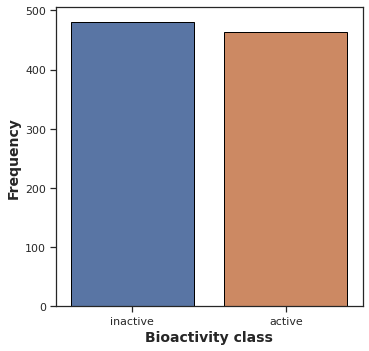

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [ ]:
sumofgroup = df_2class.groupby('class')['class'].count()

print(f'active = {sumofgroup["active"] / sum(sumofgroup)}')
print(f'inactive = {sumofgroup["inactive"] / sum(sumofgroup)}')

active = 0.491005291005291
inactive = 0.508994708994709


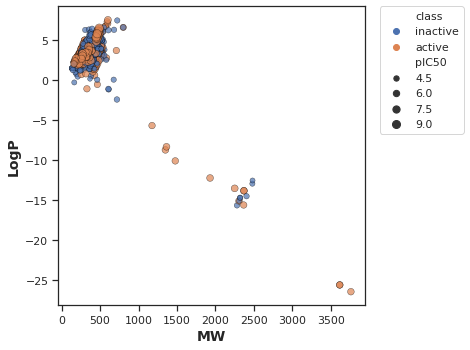

In [ ]:
#  Scatter plot of MW versus LogP¶ 
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [ ]:
df_2class[df_2class['LogP'] > 5].groupby('class')['class'].count()


class
active      48
inactive    46
Name: class, dtype: int64

In [ ]:
df_2class[df_2class['LogP'] < 0].groupby('class')['class'].count()


class
active      15
inactive    11
Name: class, dtype: int64

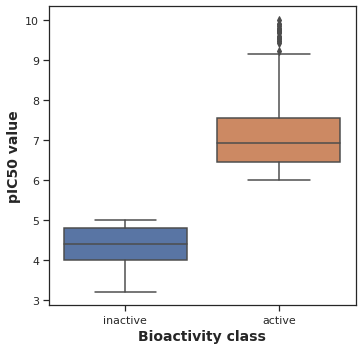

In [ ]:
# Box plots
# pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
# Statistical analysis | Mann-Whitney U Test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.068783e-156,0.05,Different distribution (reject H0)


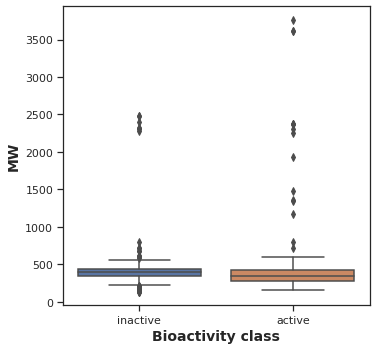

In [ ]:
# MV
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
df_2class[df_2class['MW'] > 500].groupby('class')['class'].count()

class
active      29
inactive    50
Name: class, dtype: int64

403.9392543103446
365.0329560118467


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


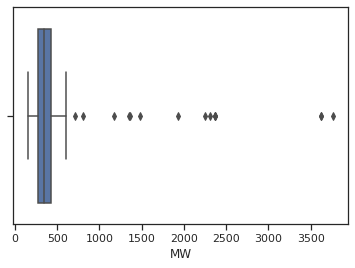

In [ ]:
active_mw =df_2class[df_2class['class']=='active']['MW']
print(active_mw.mean())
print(active_mw.std())

sns.boxplot(active_mw)

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,87730.0,6.400986e-09,0.05,Different distribution (reject H0)


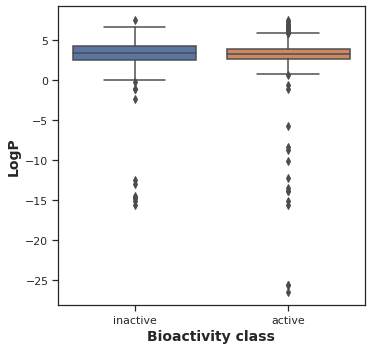

In [ ]:
# LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,106660.0,0.119859,0.05,Same distribution (fail to reject H0)


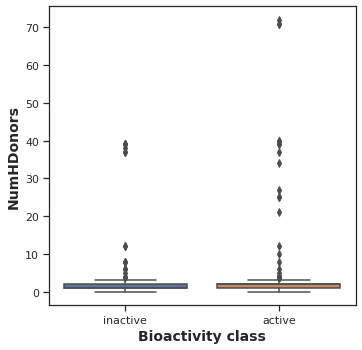

In [ ]:
# NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,81389.5,1.356751e-14,0.05,Different distribution (reject H0)


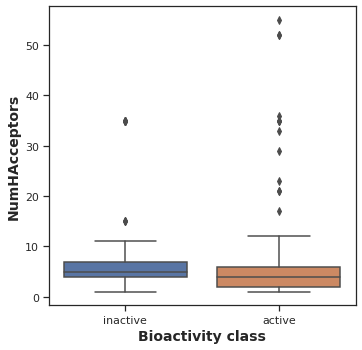

In [ ]:
# NumHAcceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,69243.0,1.277647e-24,0.05,Different distribution (reject H0)


In [ ]:
# part3

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-12-23 07:38:06--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-12-23 07:38:06--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2021-12-23 07:38:07 (168 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-12-23 07:38:07--  https://github

In [ ]:
! mv Miniconda3-latest-Linux-x86_64.sh drive/MyDrive/Colab\ Notebooks/

mv: cannot stat 'Miniconda3-latest-Linux-x86_64.sh': No such file or directory


In [ ]:
! mv *.csv drive/MyDrive/Colab\ Notebooks/

In [ ]:
! mv *.pdf drive/MyDrive/Colab\ Notebooks/

In [ ]:
! mv padel.* drive/MyDrive/Colab\ Notebooks/

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
! unzip drive/MyDrive/Colab\ Notebooks/padel.zip -d drive/MyDrive/Colab\ Notebooks/

Archive:  drive/MyDrive/Colab Notebooks/padel.zip
replace drive/MyDrive/Colab Notebooks/__MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/._PaDEL-Descriptor  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/PaDEL-Descriptor/Fingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks/__MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: drive/MyDrive/Colab Notebooks

In [ ]:
# Load bioactivity data
df3 = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_04_bioactivity_data_3class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,intermediate,133.194,1.50120,1.0,1.0,5.698970
1,1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,inactive,2280.672,-15.68259,39.0,35.0,4.806875
2,2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,intermediate,443.547,3.38510,3.0,4.0,5.698970
3,3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,intermediate,443.547,3.38510,3.0,4.0,5.698970
4,4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,intermediate,223.144,2.19670,1.0,1.0,5.045757
...,...,...,...,...,...,...,...,...,...
1158,1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,187.286,2.82720,1.0,1.0,6.385103
1159,1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,active,173.259,2.43710,1.0,1.0,6.046724
1160,1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,intermediate,173.259,2.43710,1.0,1.0,5.368556
1161,1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,inactive,159.232,2.04700,1.0,1.0,4.690370


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('drive/MyDrive/Colab Notebooks/molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat drive/MyDrive/Colab\ Notebooks/molecule.smi | head -5

N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1	CHEMBL3989843
CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@H](CCCCN)NC(=O)CNC(=O)CNC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)[C@H](CCCCN)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](C)NC(=O)[C@@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CCCCN1CC1)NC(=O)[C@@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](C)N)[C@@H](C)O)[C@@H](C)O)[C@@H](C)O)C(=O)N[C@@H](C)C(=O)O	CHEMBL1086216
N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2ccccc2)cc1	CHEMBL1215658
NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2ccccc2)c1	CHEMBL1797639
NC1CC1c1c(F)c(F)c(F)c(F)c1F	CHEMBL1797642


In [ ]:
cat drive/MyDrive/Colab\ Notebooks/molecule.smi | wc -l

1163


In [ ]:
# Calculate fingerprint descriptors
! cat drive/MyDrive/Colab\ Notebooks/padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash drive/MyDrive/Colab\ Notebooks/padel.sh

Descriptor calculation completed in 0.210 secs . Average speed: ∞ s/mol.


In [ ]:
#  Preparing the X and Y Data Matrices
#X
df3_X = pd.read_csv('drive/MyDrive/Colab Notebooks/descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3989843,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL1215658,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1797639,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1797642,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL1797643,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,CHEMBL4568420,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1082,CHEMBL4544926,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1083,CHEMBL4575332,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1084,CHEMBL4475427,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X
print(df3_X.shape)

(1086, 881)


In [ ]:
# Y variable
# Convert IC50 to pIC50

df3_Y = df3['pIC50']
df3_Y

0       5.698970
1       4.806875
2       5.698970
3       5.698970
4       5.045757
          ...   
1158    6.385103
1159    6.046724
1160    5.368556
1161    4.690370
1162    6.352617
Name: pIC50, Length: 1163, dtype: float64

In [ ]:
# Combining X and Y variable
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.698970
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.806875
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.698970
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.698970
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.045757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.385103
1159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046724
1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.368556
1161,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL3989843,N[C@@H]1C[C@H]1c1ccccc1.N[C@H]1C[C@@H]1c1ccccc1,2000.0,intermediate
1,CHEMBL1086216,CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...,15600.0,inactive
2,CHEMBL1215658,N[C@@H]1C[C@H]1c1ccc(OCC[C@H](NC(=O)c2ccccc2)C...,2000.0,intermediate
3,CHEMBL1797639,NC1CC1c1cccc(OCC[C@H](NC(=O)c2ccccc2)C(=O)NCc2...,2000.0,intermediate
4,CHEMBL1797642,NC1CC1c1c(F)c(F)c(F)c(F)c1F,9000.0,intermediate
...,...,...,...,...
1158,CHEMBL4640829,CC/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,412.0,active
1159,CHEMBL4646049,C/C(=C\c1ccccc1)[C@@H]1C[C@H]1N,898.0,active
1160,CHEMBL4643691,C/C(=C\C1CC1N)c1ccccc1,4280.0,intermediate
1161,CHEMBL4634330,NC1CC1/C=C\c1ccccc1,20400.0,inactive


In [ ]:
dataset3.to_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
# Part 4
#  Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest 

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/FA-HDAC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df.dropna(inplace=True)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.698970
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.806875
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.698970
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.698970
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.045757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
1082,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
1083,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
1084,1.0,1.0,1.0,0.0,0.0,0.

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1082,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1083,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1084,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0

In [ ]:
print(dataset3)

      PubchemFP0  PubchemFP1  PubchemFP2  ...  PubchemFP879  PubchemFP880     pIC50
0            1.0         1.0         0.0  ...           0.0           0.0  5.698970
1            1.0         1.0         1.0  ...           0.0           0.0  4.806875
2            1.0         1.0         1.0  ...           0.0           0.0  5.698970
3            1.0         0.0         0.0  ...           0.0           0.0  5.698970
4            1.0         1.0         1.0  ...           0.0           0.0  5.045757
...          ...         ...         ...  ...           ...           ...       ...
1158         NaN         NaN         NaN  ...           NaN           NaN  6.385103
1159         NaN         NaN         NaN  ...           NaN           NaN  6.046724
1160         NaN         NaN         NaN  ...           NaN           NaN  5.368556
1161         NaN         NaN         NaN  ...           NaN           NaN  4.690370
1162         NaN         NaN         NaN  ...           NaN           NaN  6

In [ ]:
Y.dropna(inplace=True)


NameError: ignored

In [ ]:
Y = df.pIC50
Y

0       5.698970
1       4.806875
2       5.698970
3       5.698970
4       5.045757
          ...   
1081    4.000000
1082    4.000000
1083    4.000000
1084    4.301030
1085    4.000000
Name: pIC50, Length: 1086, dtype: float64

In [ ]:
X.shape, Y.shape

((1086, 881), (1086,))

In [ ]:
df.to_csv('kubraHDAI.csv')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6927076367493579

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_train,model.predict(X_train))

0.9372437656361602

In [ ]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


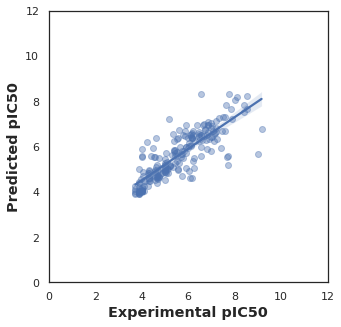

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()